# Avaliação do desempenho de um classificador Zero-shot na tarefa de análise de sentimentos

Neste notebook será apresentada uma comparação de um analisador de sentimentos Zero-shot em relação à outros dois dois classificadores baseador em *Transformers*: Bertimbau e PTT5. Os modelos são baseados nos modelos BERT e T5 respectivamente, e foram ajustados para trabalhar com texto em português brasileiro. Além disto, os modelos foram pré-treinados no conjunto de tweets TweetSentBr para realização da tarefa de análise de sentimentos.


In [1]:
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [24]:
sns.set(rc={'figure.figsize':(10,8)})

In [3]:
predictions_path = "data/predictions"

# Definindo função auxiliar para leitura de arquivos de predição

In [4]:
def load_metrics(use_binary: bool, average: str = "macro") -> pd.DataFrame:
    
    # Leitura e cálculo de métricas a partir dos arquivos
    suffix = "_binary_preds.csv" if use_binary else \
             "_all_classes_preds.csv"

    results_df = pd.DataFrame()         

    for file in os.listdir(predictions_path):
        if suffix not in file: continue

        model_name = file.replace(suffix, "")
        df = pd.read_csv(os.path.join(predictions_path, file), index_col=0)

        real = df["label"] 
        preds = df["prediction"]
        metrics_dict = classification_report(real, preds, output_dict=True)

        results_df = results_df.append(
            {
                "Model": model_name,
                "Accuracy": metrics_dict["accuracy"],
                "Precision": metrics_dict["macro avg"]["precision"],
                "Recall": metrics_dict["macro avg"]["recall"],
                "F1": metrics_dict["macro avg"]["f1-score"]
            },
            ignore_index=True
        )
    
    return results_df.set_index("Model").sort_index()



# Analisando predições

Comparando métricas obtidas usando duas e três classes. Métricas obtidas através de média Macro.

In [5]:
binary_df = load_metrics(True)
all_classes_df = load_metrics(False)

In [22]:
binary_df

,Accuracy,F1,Precision,Recall
Model,,,,
bertimbau,0.872004,0.865989,0.866622,0.865384
ptt5,0.863290,0.857138,0.857054,0.857222
zero_shot,0.775599,0.767727,0.765755,0.770657


In [23]:
all_classes_df

,Accuracy,F1,Precision,Recall
Model,,,,
bertimbau,0.721478,0.696104,0.698060,0.695480
ptt5,0.719854,0.691299,0.699780,0.690627
zero_shot,0.590337,0.509301,0.559107,0.538542


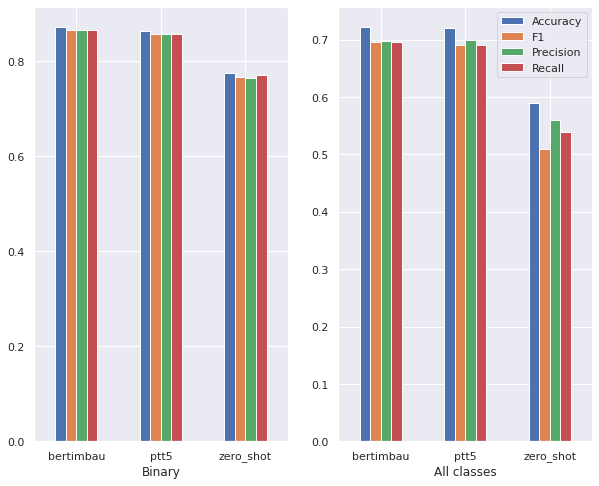

In [26]:
fig, axes = plt.subplots(1,2)

binary_df.plot.bar(rot=0, ax=axes[0], xlabel="Binary")
axes[0].legend().set_visible(False)
all_classes_df.plot.bar(rot=0, ax=axes[1], xlabel="All classes")
# axes[1].get_yaxis().set_visible(False)